In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [43]:
data = pd.read_csv("testsample.csv")
train, test = train_test_split(data, test_size = 0.4, random_state=42)
features = list(data.columns[3:34])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.87398688, -0.71843318, -0.60802107, ..., -0.36728682,
        -0.35024709, -0.2981569 ],
       [-0.7626362 , -0.66144215, -0.56430109, ..., -0.39206473,
        -0.38355449, -1.13734234],
       [-0.6060493 , -0.50615116, -0.42940439, ..., -0.49493061,
        -0.43600121, -0.6471251 ],
       ...,
       [-1.17324185,  2.30094394,  2.37390596, ..., -0.24665092,
        -0.19390118, -0.56819182],
       [-1.88310246, -0.01426884,  0.18828049, ...,  2.99149678,
         3.05878978, -1.05425467],
       [-0.81483183, -0.28966174, -0.1954838 , ..., -0.13026982,
        -0.13424614,  1.95351889]])

In [44]:
features

['H.period',
 'DD.period.t',
 'UD.period.t',
 'H.t',
 'DD.t.i',
 'UD.t.i',
 'H.i',
 'DD.i.e',
 'UD.i.e',
 'H.e',
 'DD.e.five',
 'UD.e.five',
 'H.five',
 'DD.five.Shift.r',
 'UD.five.Shift.r',
 'H.Shift.r',
 'DD.Shift.r.o',
 'UD.Shift.r.o',
 'H.o',
 'DD.o.a',
 'UD.o.a',
 'H.a',
 'DD.a.n',
 'UD.a.n',
 'H.n',
 'DD.n.l',
 'UD.n.l',
 'H.l',
 'DD.l.Return',
 'UD.l.Return',
 'H.Return']

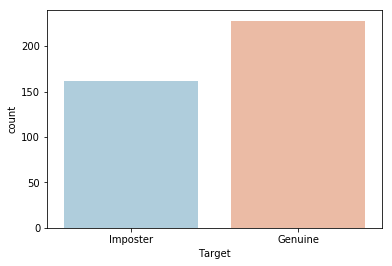

In [45]:
sns.countplot(x='Target',data=train,palette='RdBu_r')

In [47]:
from sklearn.svm import SVC
 model= SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

IndentationError: unexpected indent (<ipython-input-47-a844691054a1>, line 2)

In [48]:
cm = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))


[[165   7]
 [ 41  47]]


In [49]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    Genuine       0.80      0.96      0.87       172
   Imposter       0.87      0.53      0.66        88

avg / total       0.82      0.82      0.80       260



In [50]:
model_accuracy = metrics.accuracy_score(y_test,predictions)
print('Accuracy of Model is : ',model_accuracy)
print('Error Rate           :', 1-model_accuracy)


Accuracy of Model is :  0.8153846153846154
Error Rate           : 0.18461538461538463


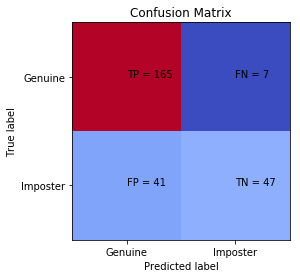

In [51]:
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.coolwarm)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

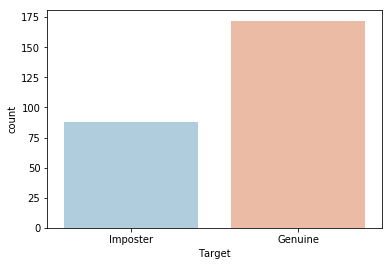

In [52]:
sns.countplot(x='Target',data=test,palette='RdBu_r')

In [53]:
y_pred_proba = model.predict_proba(X_test)


AttributeError: predict_proba is not available when  probability=False